In [0]:
import tensorflow as tf
import numpy as np
import random
from matplotlib import pyplot as plt

Loading dataset...

In [10]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
label_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("Brief on training dataset:")
print("  Num of figures: {:d}".format(y_train.shape[0]))
print("  Size of figure: {:d}x{:d}".format(x_train.shape[1], x_train.shape[2]))
print("Brief on testing dataset:")
print("  Num of figures: {:d}".format(y_test.shape[0]))
print("  Size of figure: {:d}x{:d}".format(x_test.shape[1], x_test.shape[2]))

Brief on training dataset:
  Num of figures: 60000
  Size of figure: 28x28
Brief on testing dataset:
  Num of figures: 10000
  Size of figure: 28x28


Building model...

In [11]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
model.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'))

model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
model.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Activation('elu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Activation('softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_3 (Batch (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_4 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 14, 14, 64)       

Compiling model...

In [0]:
loc_optimizer = tf.keras.optimizers.Adam(lr=1e-3, )
loc_loss = tf.keras.losses.sparse_categorical_crossentropy
loc_metrics = ['sparse_categorical_accuracy']
model.compile(optimizer=loc_optimizer,loss=loc_loss,metrics=loc_metrics)

Fitting model...

In [13]:
model.fit(x_train.astype(np.float32), y_train.astype(np.float32), verbose = 1, batch_size = 128, epochs=16)

Epoch 1/16
60000/60000 [==============================] - 14s 226us/sample - loss: 0.8006 - sparse_categorical_accuracy: 0.7450
Epoch 2/16
60000/60000 [==============================] - 13s 219us/sample - loss: 0.4313 - sparse_categorical_accuracy: 0.8481
Epoch 3/16
60000/60000 [==============================] - 13s 219us/sample - loss: 0.3271 - sparse_categorical_accuracy: 0.8835
Epoch 4/16
60000/60000 [==============================] - 13s 219us/sample - loss: 0.2794 - sparse_categorical_accuracy: 0.8992
Epoch 5/16
60000/60000 [==============================] - 13s 220us/sample - loss: 0.2471 - sparse_categorical_accuracy: 0.9112
Epoch 6/16
60000/60000 [==============================] - 13s 219us/sample - loss: 0.2276 - sparse_categorical_accuracy: 0.9183
Epoch 7/16
60000/60000 [==============================] - 13s 218us/sample - loss: 0.2128 - sparse_categorical_accuracy: 0.9228
Epoch 8/16
60000/60000 [==============================] - 13s 219us/sample - loss: 0.1998 - sparse_categ

Evaluating model...

In [14]:
score = model.evaluate(x_test.astype(np.float32), y_test.astype(np.float32), verbose = 1)
print("Loss: ", score[0])
print("Accuracy: ", score[1])

10000/10000 [==============================] - 2s 151us/sample - loss: 0.2010 - sparse_categorical_accuracy: 0.9341
Loss:  0.20095196058303116
Accuracy:  0.9341


Predicting...

Choosing 10 figures randomly from testing dataset: 
   Index        Prediction            Actual   Judgement
    3467       T-shirt/top       T-shirt/top           1
      74          Pullover          Pullover           1
     651       T-shirt/top       T-shirt/top           1
    1408             Shirt              Coat           0
    3201       T-shirt/top       T-shirt/top           1
    6617             Shirt             Shirt           1
    1687             Dress             Dress           1
    5278           Trouser           Trouser           1
     685              Coat              Coat           1
    1706             Shirt             Shirt           1


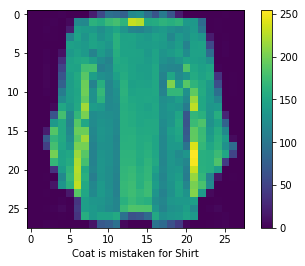

In [15]:
print("Choosing 10 figures randomly from testing dataset: ")

idx = []
cnt = 0
while cnt < 10:
  loc_idx = random.randint(0, 10000)
  if loc_idx not in idx:
    idx.append(loc_idx)
    cnt = cnt + 1

pred = model.predict_classes(np.array([x_test[e] for e in idx]))
judgement = []

print("{:>8s}{:>18s}{:>18s}{:>12s}".format("Index", "Prediction", "Actual", "Judgement"))
for i in range(10):
  loc_idx = idx[i]
  loc_pred = label_name[pred[i]]
  loc_ans = label_name[y_test[idx[i]]]
  loc_judge = pred[i]== y_test[idx[i]]
  judgement.append(loc_judge)
  print("{:>8d}{:>18s}{:>18s}{:>12b}".format(loc_idx, loc_pred, loc_ans, loc_judge))
  
for i in range(10):
  if not judgement[i]:
    loc_idx = idx[i]
    plt.figure()
    loc_img = np.squeeze(x_test[loc_idx])
    plt.imshow(loc_img)
    plt.colorbar()
    plt.grid(False)
    plt.xlabel("{:s} is mistaken for {:s}".format(label_name[y_test[loc_idx]], label_name[pred[i]]))

Error Analysis

In [16]:
import pandas as pd

y_pred=model.predict_classes(x_test)
con_mat = tf.confusion_matrix(labels=y_test, predictions=y_pred)
print(con_mat)

Tensor("confusion_matrix_1/SparseTensorDenseAdd:0", shape=(10, 10), dtype=int32)
